In [2]:
import tensorflow as tf 
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential,load_model
import numpy as np

2023-02-04 13:05:51.061307: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-04 13:05:51.171718: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-04 13:05:51.171736: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-04 13:05:51.749840: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [3]:
Image_size=256
Batch_size=32
Channels=3
epochs=10

In [4]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
'potatoleaf',
    shuffle=True,
    image_size=(Image_size,Image_size),
    batch_size=Batch_size
)

Found 3251 files belonging to 3 classes.


2023-02-04 13:05:57.849031: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-04 13:05:57.849049: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-04 13:05:57.849065: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kali): /proc/driver/nvidia/version does not exist
2023-02-04 13:05:57.849297: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
class_names=dataset.class_names

In [9]:
class_names

['Early_Blight', 'Healthy', 'Late_Blight']

In [10]:
len(dataset)

102

In [11]:
102*32

3264

In [12]:
for image_batach,label_batch in dataset.take(1):
    print(image_batach.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[2 1 0 0 2 0 0 0 1 2 2 0 1 1 2 2 1 1 2 0 0 2 1 0 0 2 0 0 0 2 0 1]


2023-02-04 13:06:36.941285: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 25165824 exceeds 10% of free system memory.


2023-02-04 13:06:37.617781: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 25165824 exceeds 10% of free system memory.


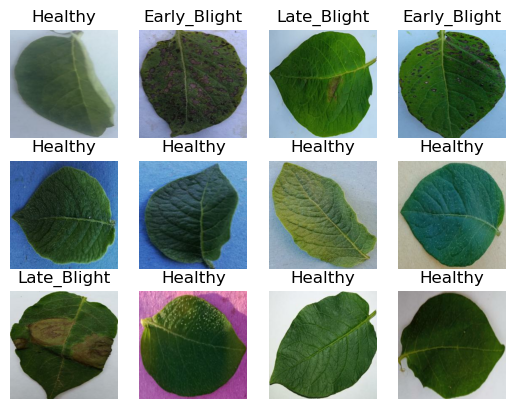

In [13]:
for image_batach,label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batach[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')


In [14]:
train_size=0.8
len(dataset)*train_size

81.60000000000001

In [15]:
train_ds=dataset.take(81)

In [16]:
len(train_ds)

81

In [17]:
test_ds=dataset.skip(81)

In [18]:
len(test_ds)

21

In [19]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    
    return train_ds,val_ds,test_ds

In [20]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [21]:
len(train_ds)

81

In [22]:
len(val_ds)

10

In [23]:
len(test_ds)

11

In [24]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [25]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_size,Image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    
    
])

In [26]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [23]:
input_shape=(Batch_size,Image_size,Image_size,Channels)
n_class=3
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_class,activation='softmax'),
])
model.build(input_shape=input_shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [25]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])

In [26]:
history=model.fit(train_ds,epochs=epochs,batch_size=Batch_size,verbose=1,validation_data=val_ds)

Epoch 1/10
81/81 [==============================] - 268s 3s/step - loss: 0.9879 - accuracy: 0.5223 - val_loss: 0.8983 - val_accuracy: 0.5781
Epoch 2/10
81/81 [==============================] - 264s 3s/step - loss: 0.8235 - accuracy: 0.6596 - val_loss: 0.6279 - val_accuracy: 0.7875
Epoch 3/10
81/81 [==============================] - 247s 3s/step - loss: 0.6501 - accuracy: 0.7445 - val_loss: 0.4755 - val_accuracy: 0.8125
Epoch 4/10
81/81 [==============================] - 194s 2s/step - loss: 0.5388 - accuracy: 0.7929 - val_loss: 0.2831 - val_accuracy: 0.9125
Epoch 5/10
81/81 [==============================] - 142s 2s/step - loss: 0.3385 - accuracy: 0.8775 - val_loss: 0.2697 - val_accuracy: 0.9062
Epoch 6/10
81/81 [==============================] - 106s 1s/step - loss: 0.2840 - accuracy: 0.8965 - val_loss: 0.1875 - val_accuracy: 0.9375
Epoch 7/10
81/81 [==============================] - 129s 2s/step - loss: 0.2729 - accuracy: 0.8953 - val_loss: 0.2879 - val_accuracy: 0.8969
Epoch 8/10
81

In [28]:
model.save('potato.h5')

In [29]:
scores=model.evaluate(test_ds)

11/11 [==============================] - 4s 250ms/step - loss: 0.1349 - accuracy: 0.9517


In [30]:
scores

[0.13490252196788788, 0.9517045617103577]

In [32]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 81}

In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [34]:
history.history['accuracy']

[0.5222954750061035,
 0.6595579385757446,
 0.7444745898246765,
 0.792943000793457,
 0.8774718642234802,
 0.8964715003967285,
 0.895308256149292,
 0.9267157912254333,
 0.9317564964294434,
 0.955409049987793]

In [35]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

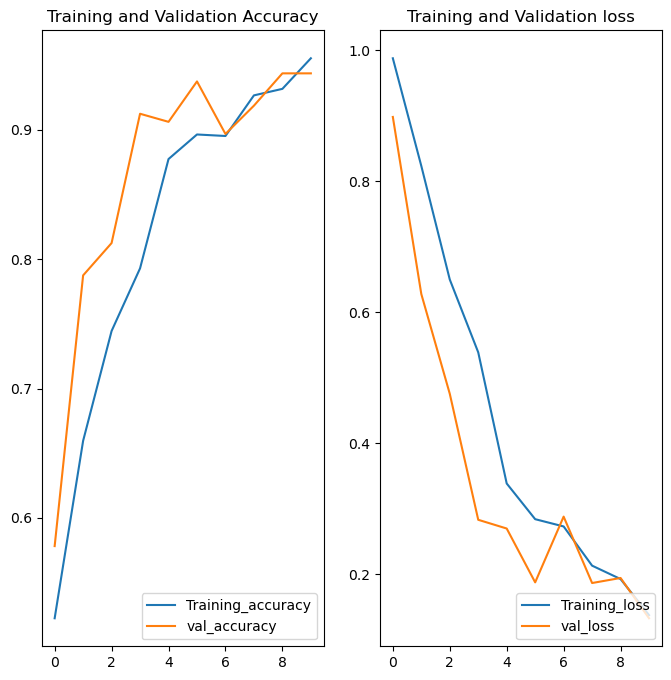

In [38]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs),acc,label='Training_accuracy')
plt.plot(range(epochs),val_acc,label='val_accuracy')
plt.legend(loc='lower right')
plt.title("Training and Validation Accuracy")


plt.subplot(1,2,2)
plt.plot(range(epochs),loss,label='Training_loss')
plt.plot(range(epochs),val_loss,label='val_loss')
plt.legend(loc='lower right')
plt.title("Training and Validation loss")






First image to predict
 actual label: Early_Blight


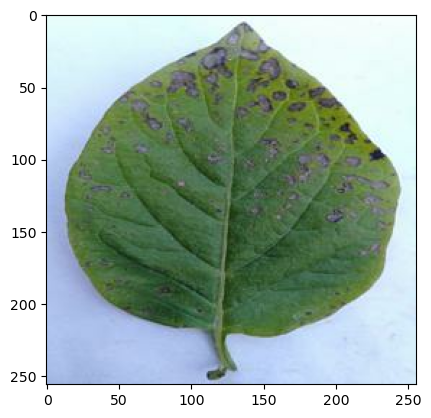

In [47]:
for image_batch,label_batch in test_ds.take(1):
    #plt.imshow(image_batach[0].numpy().astype('uint8'))
    #print(image_batach[0].numpy().astype('uint8'))
    first_image=image_batch[0].numpy().astype('uint8')
    first_label=label_batch[0]
    print('First image to predict')
    plt.imshow(first_image)
    print(' actual label:',class_names[first_label])

In [30]:
model1=load_model('potato.h5')

First image to predict
 actual label: Healthy
1/1 [==============================] - 0s 445ms/step
Predicted image Healthy


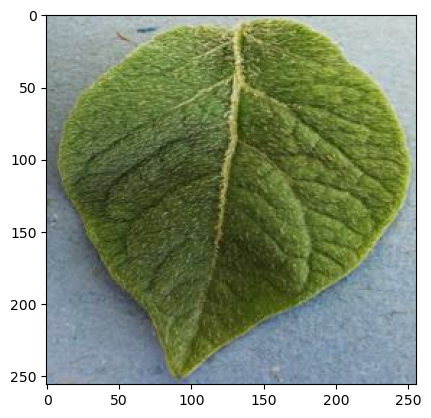

In [32]:
for image_batch,label_batch in test_ds.take(1):
    #plt.imshow(image_batach[0].numpy().astype('uint8'))
    #print(image_batach[0].numpy().astype('uint8'))
    first_image=image_batch[0].numpy().astype('uint8')
    first_label=label_batch[0]
    print('First image to predict')
    plt.imshow(first_image)
    print(' actual label:',class_names[first_label])
    
    batch_prediction=model1.predict(image_batach)
    print("Predicted image",class_names[np.argmax(batch_prediction[0])])

In [28]:
def predict(model ,img):
    img_arry=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_arry=tf.expand_dims(img_arry,0) #createing a batch
    
    predictions=model.predict(img_arry)
    
    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 22ms/step


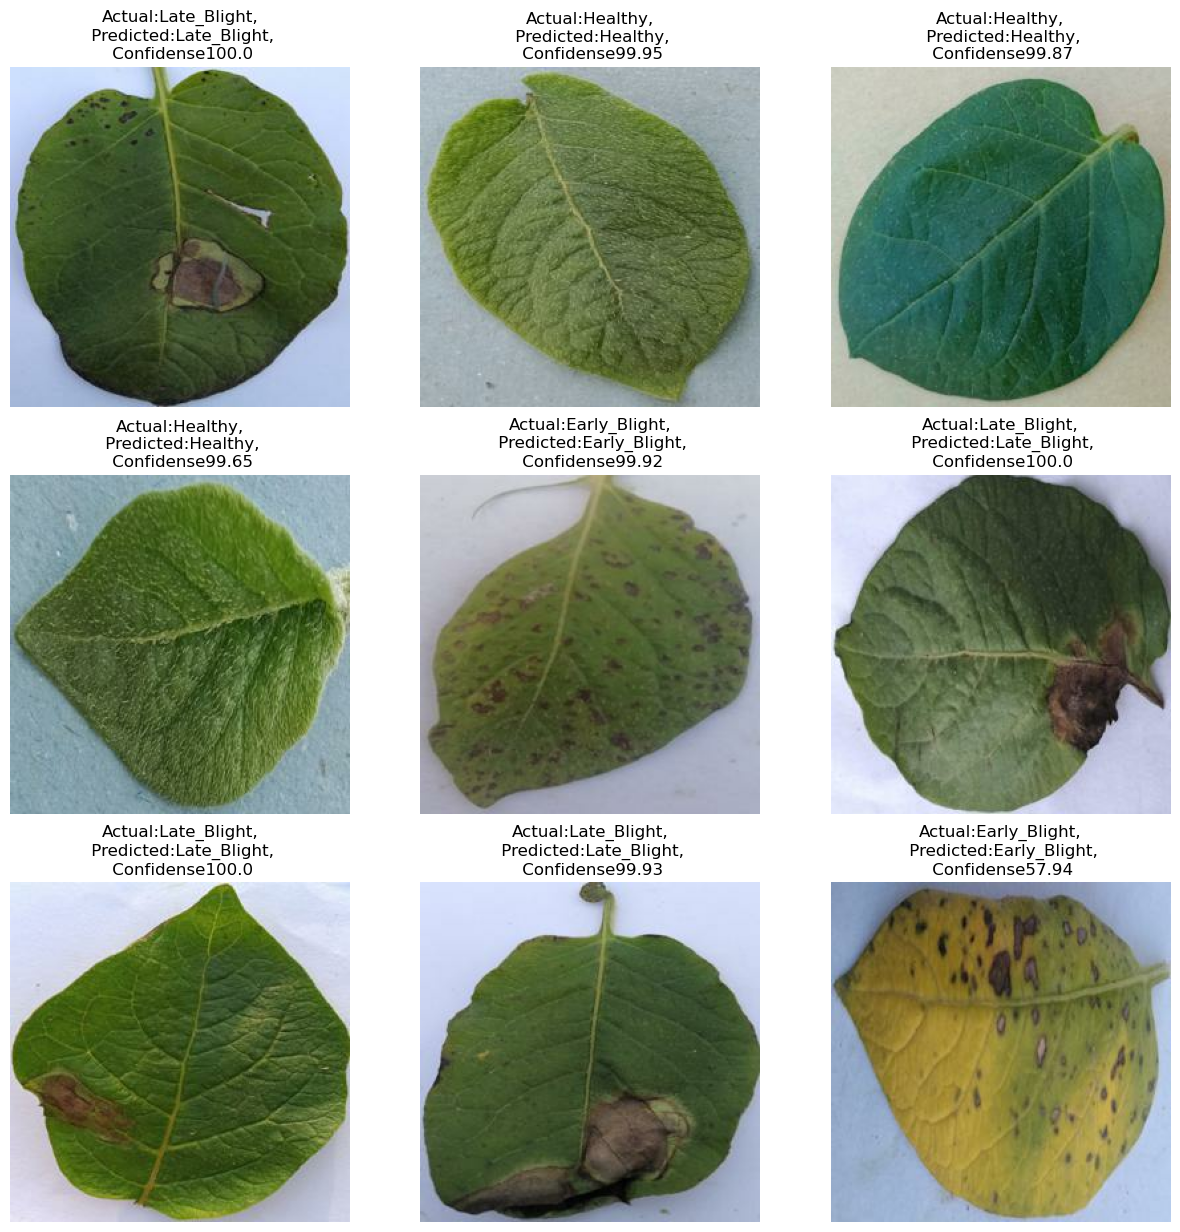

In [99]:
plt.figure(figsize=(15,15))
for images ,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence=predict(model,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class},\n Confidense{confidence}")
        
        plt.axis('off')
        
    

1/1 [==============================] - 0s 23ms/step


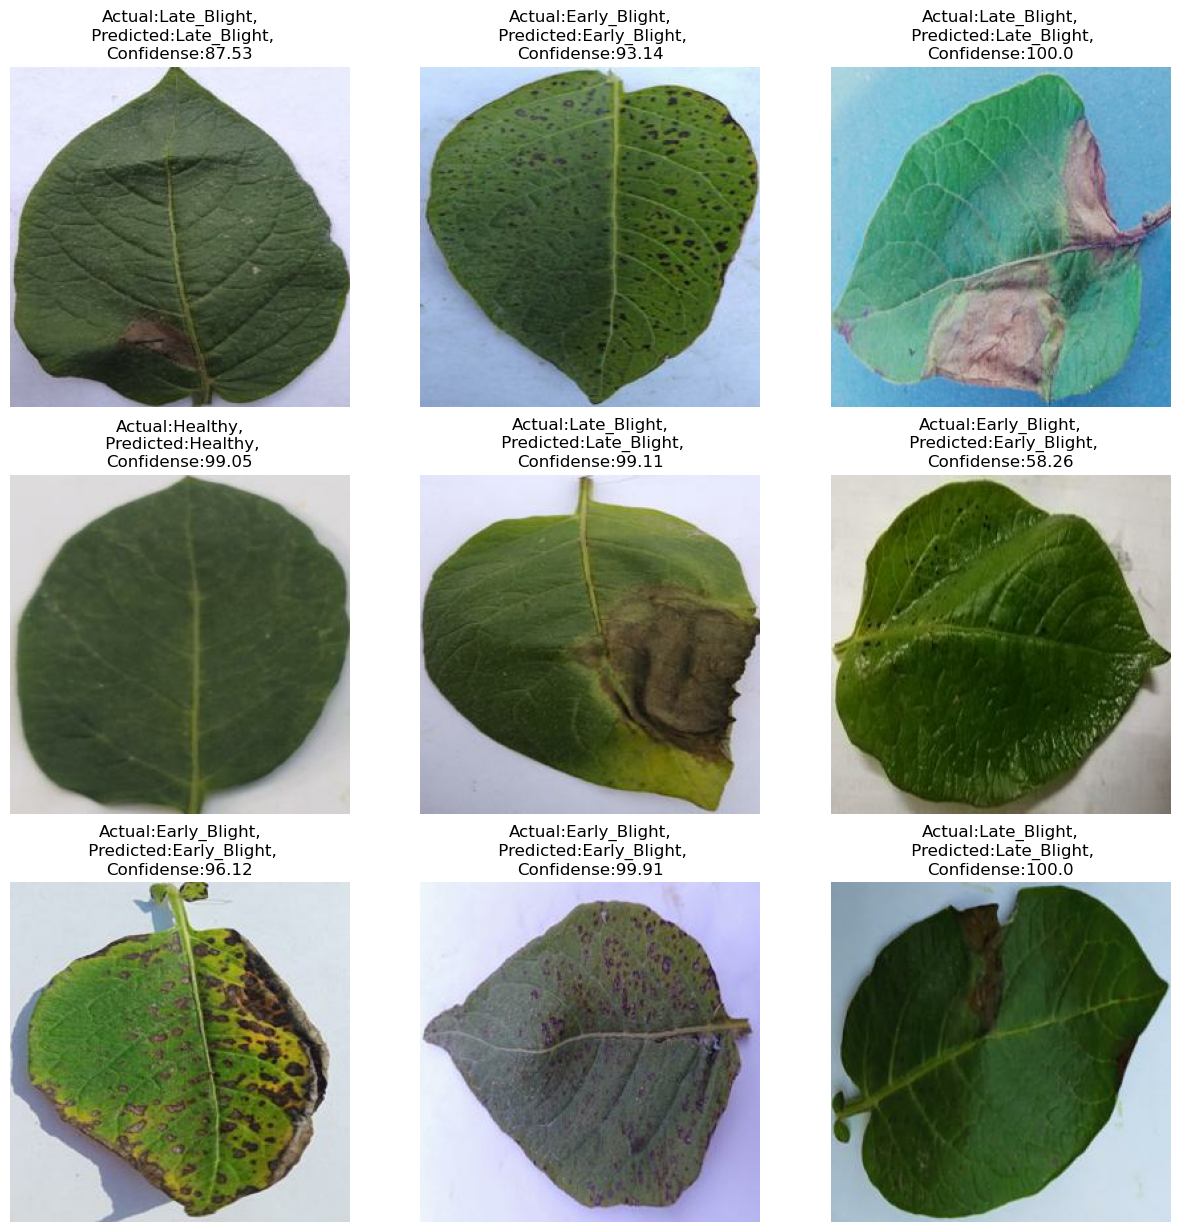

In [33]:
plt.figure(figsize=(15,15))
for images ,labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence=predict(model1,images[i].numpy())
        actual_class=class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class},\nConfidense:{confidence}")
        
        plt.axis('off')

In [103]:
model_version=1
model.save(f"../media/revanth/Data/Jupyter/models{model_version}")

INFO:tensorflow:Assets written to: ../media/revanth/Data/Jupyter/models1/assets


INFO:tensorflow:Assets written to: ../media/revanth/Data/Jupyter/models1/assets
